In [ ]:
# Importing libraries


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor


%matplotlib inline
from matplotlib import style
# style.use("seaborn")

from IPython.display import HTML
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [ ]:
calories = pd.read_csv('calories.csv')

In [ ]:
exercise = pd.read_csv('exercise.csv')

In [ ]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [ ]:
data = pd.merge(calories,exercise,on='User_ID')

In [ ]:
data.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [ ]:
calories_data = pd.concat([exercise, calories['Calories']], axis=1)

In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
# Checking for missing values
calories_data.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [ ]:
calories_data.duplicated().any()

False

In [ ]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [ ]:
sns.set()

Text(0, 0.5, 'count')

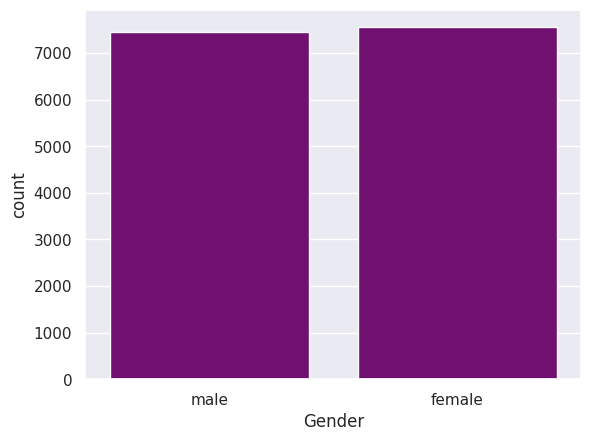

In [ ]:
# plotting the gender column in count plot
sns.countplot(x=calories_data['Gender'], color='purple')
plt.xlabel('Gender')
plt.ylabel('count')

In [ ]:
def plot_graph(data):

    numerical_columns = calories_data.select_dtypes(include=np.number).columns

    for column in numerical_columns:
        plt.figure(figsize=(5,3))
        sns.distplot(calories_data[column],kde=True)
        plt.title(f"Histogram for {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()

    categorical_columns = calories_data.select_dtypes(include='object').columns
    for column in categorical_columns:
        plt.figure(figsize=(5, 3))
        sns.countplot(x=column, data=data)
        plt.title(f"Countplot for {column}")
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()

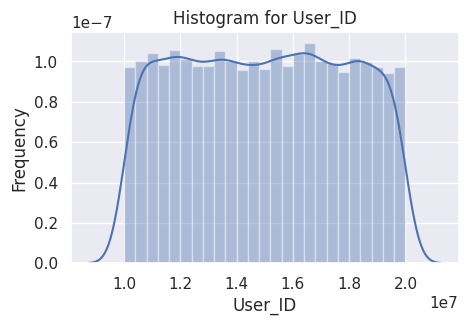

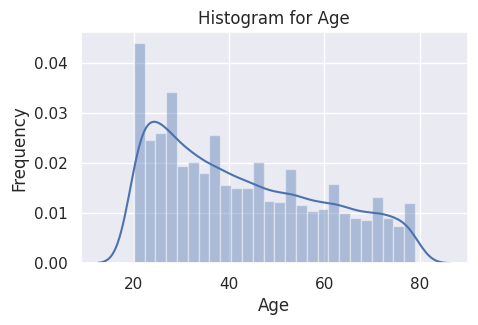

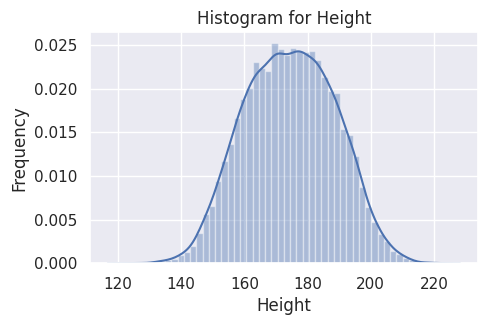

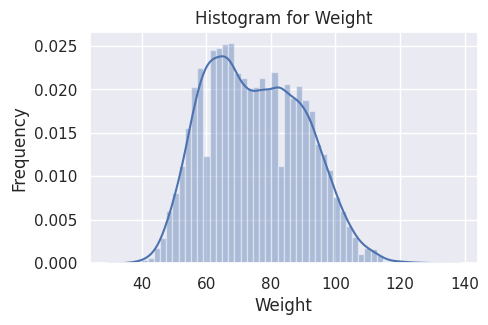

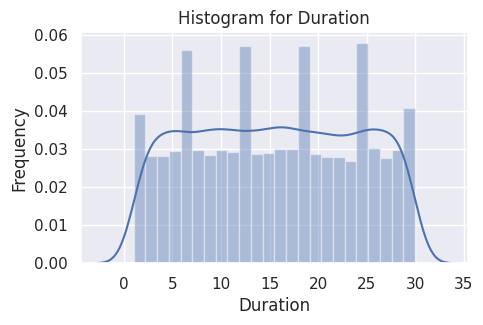

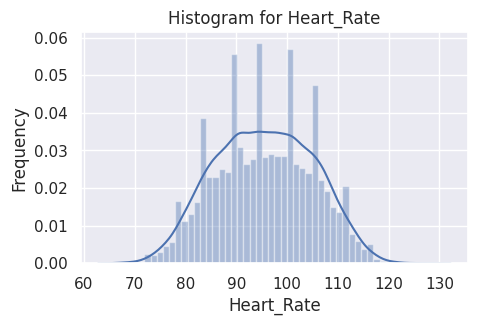

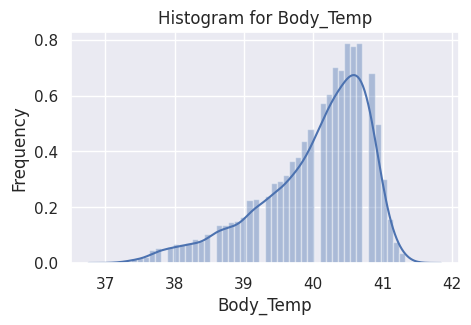

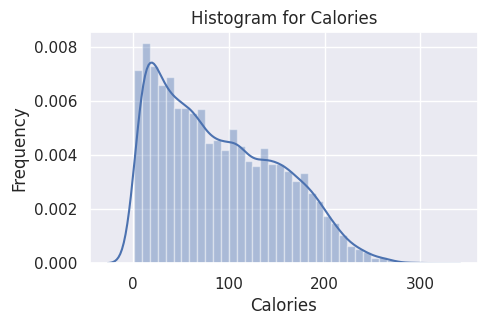

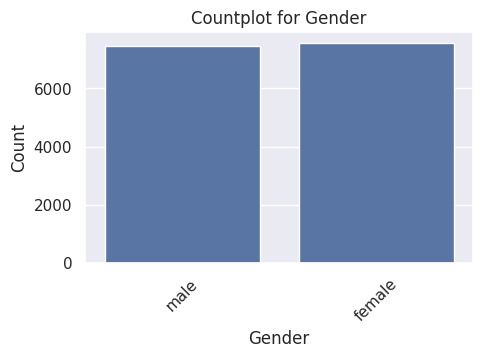

In [ ]:
plot_graph(data)

In [ ]:
correlation = calories_data.corr(numeric_only=True)

<Axes: >

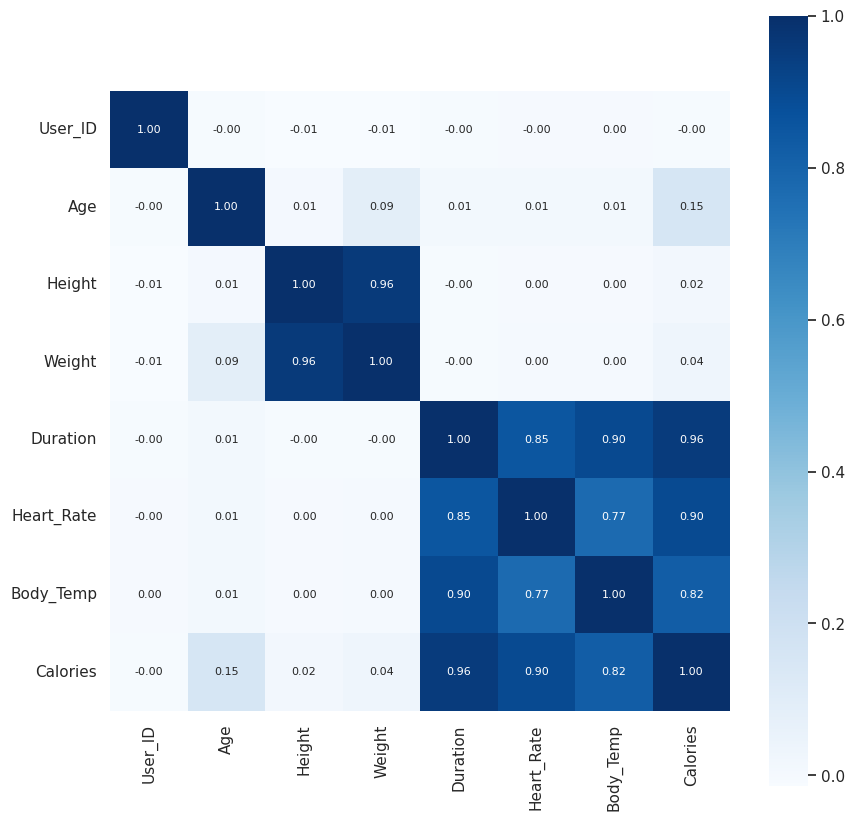

In [ ]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f' ,annot=True, annot_kws={'size':8}, cmap='Blues')


In [ ]:
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd



df = pd.DataFrame(calories_data)

# Standardization (Z-score normalization)
scaler_standard = StandardScaler()
df_standardized = pd.DataFrame(scaler_standard.fit_transform(df), columns=df.columns)

# MinMax Scaling
scaler_minmax = MinMaxScaler()
df_minmax = pd.DataFrame(scaler_minmax.fit_transform(df), columns=df.columns)

print("Standardized Data:")
print(df_standardized)
print("\nMinMax Scaled Data:")
print(df_minmax)

Standardized Data:
        User_ID    Gender       Age    Height    Weight  Duration  Heart_Rate  \
0     -0.084934 -1.007092  1.484726  1.089582  1.265909  1.619127    0.989404   
1     -0.040261  0.992958 -1.342179 -0.593726 -0.995458 -0.183990   -0.158461   
2     -1.321900 -1.007092  1.543620  0.318066  0.268247 -1.265861   -0.784569   
3      0.418779  0.992958 -0.517665  0.318066 -0.263839 -0.304198    0.467647   
4      0.972783  0.992958 -0.929922 -1.435380 -1.128480 -0.664821   -1.515029   
...         ...       ...       ...       ...       ...       ...         ...   
14995  0.232085  0.992958 -1.342179  1.299996  0.733822 -0.544614   -0.367164   
14996  0.778075  0.992958 -0.929922 -0.663864 -0.662904 -1.145653   -1.097623   
14997  0.798477  0.992958  0.012379 -1.084691 -1.128480  0.056426   -0.575866   
14998  1.276015 -1.007092  2.073665  1.299996  1.465441 -1.626484   -1.201975   
14999 -1.122905 -1.007092  1.190257 -0.102761  0.268247  0.296841   -0.367164   

       B

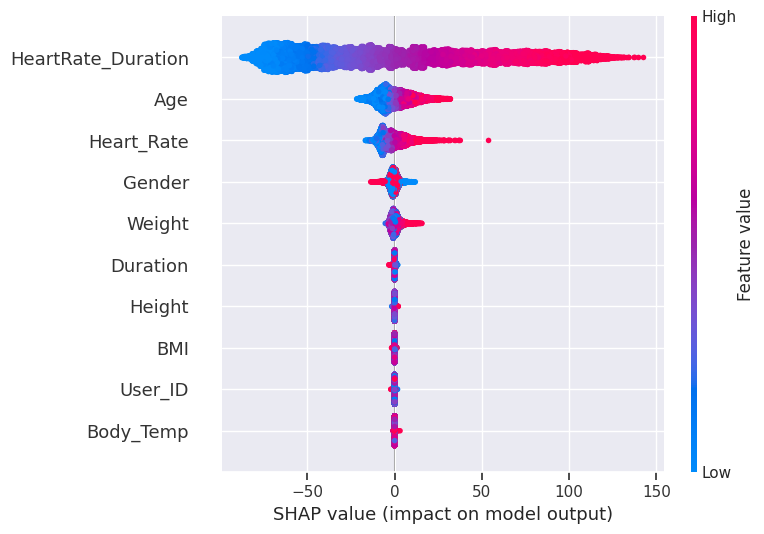

Final selected features: ['Age', 'Duration', 'Heart_Rate', 'Body_Temp', 'HeartRate_Duration']


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import shap
from sklearn.preprocessing import StandardScaler



df = pd.DataFrame(calories_data)

# Feature Engineering: Creating new features
df['HeartRate_Duration'] = df['Heart_Rate'] * df['Duration']
df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2

# Standardizing features for better performance
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop(columns=['Calories'])), columns=df.drop(columns=['Calories']).columns)

df_scaled['Calories'] = df['Calories']

# Splitting features and target variable
X = df_scaled.drop(columns=['Calories'])
y = df_scaled['Calories']

# Training XGBoost model to check feature importance
model = xgb.XGBRegressor()
model.fit(X, y)

# Using SHAP for feature importance analysis
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Plot feature importance
shap.summary_plot(shap_values, X)

# Removing redundant features based on low correlation
correlation_matrix = df_scaled.corr()
correlation_target = correlation_matrix['Calories'].abs()
selected_features = correlation_target[correlation_target > 0.1].index.tolist()
selected_features.remove('Calories')

# Final feature set
df_final = df_scaled[selected_features]
print("Final selected features:", selected_features)


In [ ]:
print(X)

        User_ID    Gender       Age    Height    Weight  Duration  Heart_Rate  \
0     -0.084934 -1.007092  1.484726  1.089582  1.265909  1.619127    0.989404   
1     -0.040261  0.992958 -1.342179 -0.593726 -0.995458 -0.183990   -0.158461   
2     -1.321900 -1.007092  1.543620  0.318066  0.268247 -1.265861   -0.784569   
3      0.418779  0.992958 -0.517665  0.318066 -0.263839 -0.304198    0.467647   
4      0.972783  0.992958 -0.929922 -1.435380 -1.128480 -0.664821   -1.515029   
...         ...       ...       ...       ...       ...       ...         ...   
14995  0.232085  0.992958 -1.342179  1.299996  0.733822 -0.544614   -0.367164   
14996  0.778075  0.992958 -0.929922 -0.663864 -0.662904 -1.145653   -1.097623   
14997  0.798477  0.992958  0.012379 -1.084691 -1.128480  0.056426   -0.575866   
14998  1.276015 -1.007092  2.073665  1.299996  1.465441 -1.626484   -1.201975   
14999 -1.122905 -1.007092  1.190257 -0.102761  0.268247  0.296841   -0.367164   

       Body_Temp  HeartRate

In [ ]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2 , random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 10) (12000, 10) (3000, 10)


In [ ]:
model_1 = XGBRegressor()

In [ ]:
# training the model with X_train
model_1.fit(X_train, Y_train)
print(model_1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [ ]:
test_data_prediction_1 = model_1.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
R1 = r2_score(Y_test,test_data_prediction_1)
print(R1)

0.9989801952251296


In [ ]:
M1 = metrics.mean_absolute_error(Y_test, test_data_prediction_1)

In [ ]:
Rm1 = metrics.root_mean_squared_error(Y_test, test_data_prediction_1)

<Axes: xlabel='Calories', ylabel='Density'>

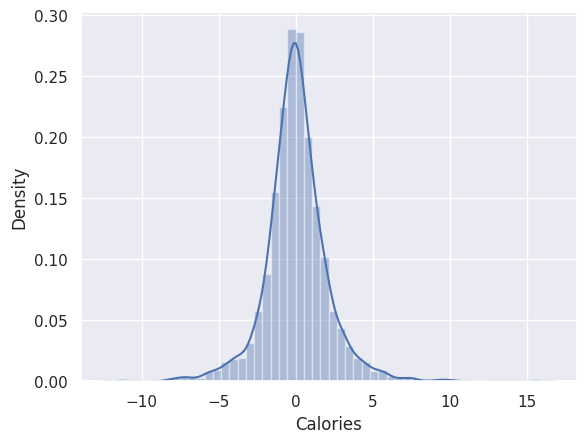

In [ ]:
sns.distplot(Y_test-test_data_prediction_1)

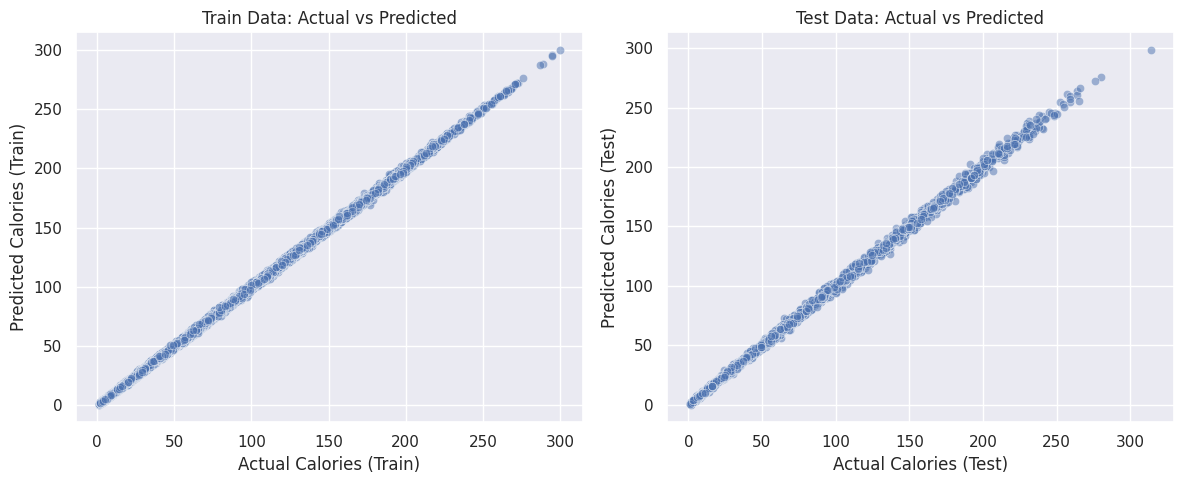

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predicting on train and test data
train_predictions = model_1.predict(X_train)
test_predictions = model_1.predict(X_test)

# Plot actual vs predicted for train and test sets
plt.figure(figsize=(12, 5))

# Train data plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=Y_train, y=train_predictions, alpha=0.5)
plt.xlabel("Actual Calories (Train)")
plt.ylabel("Predicted Calories (Train)")
plt.title("Train Data: Actual vs Predicted")

# Test data plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=Y_test, y=test_predictions, alpha=0.5)
plt.xlabel("Actual Calories (Test)")
plt.ylabel("Predicted Calories (Test)")
plt.title("Test Data: Actual vs Predicted")

plt.tight_layout()
plt.show()


In [ ]:
model_2 = LinearRegression()

In [ ]:
# training the model with X_train
model_2.fit(X_train, Y_train)
print(model_2)

LinearRegression()


In [ ]:
test_data_prediction_2 = model_2.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
R2 = r2_score(Y_test,test_data_prediction_2)

In [ ]:
M2 = metrics.mean_absolute_error(Y_test, test_data_prediction_2)

In [ ]:
Rm2 = metrics.root_mean_squared_error(Y_test, test_data_prediction_2)

<Axes: xlabel='Calories', ylabel='Density'>

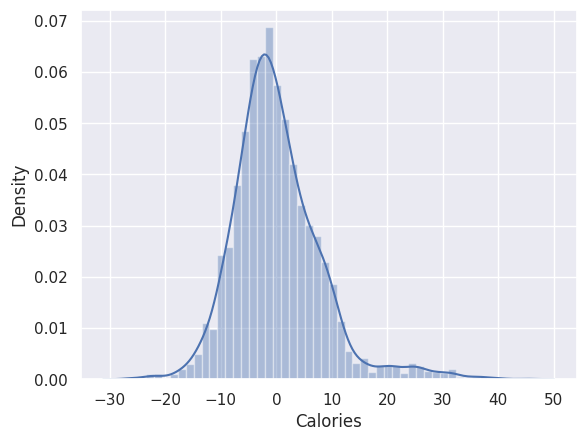

In [ ]:
sns.distplot(Y_test-test_data_prediction_2)

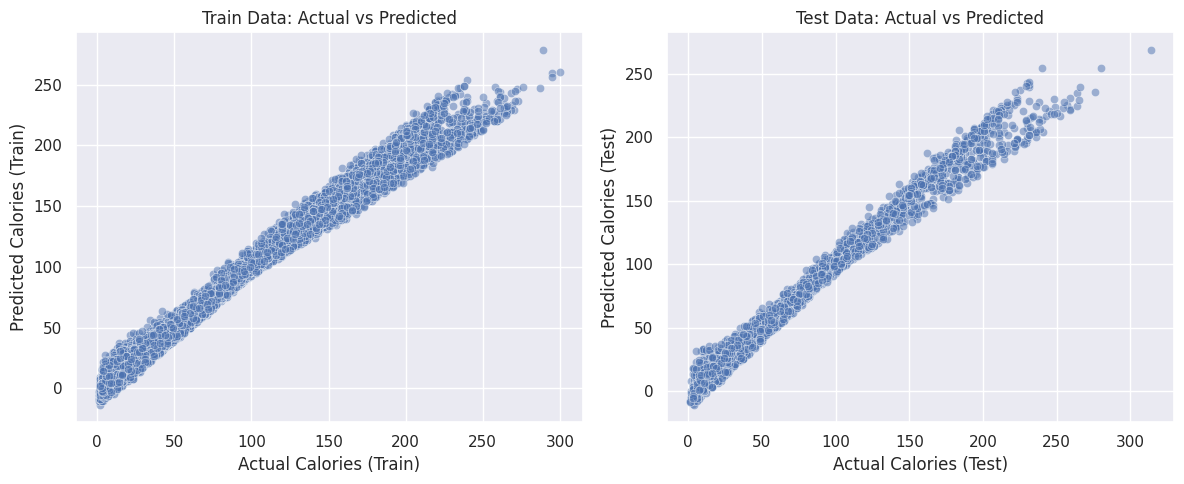

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predicting on train and test data
train_predictions = model_2.predict(X_train)
test_predictions = model_2.predict(X_test)

# Plot actual vs predicted for train and test sets
plt.figure(figsize=(12, 5))

# Train data plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=Y_train, y=train_predictions, alpha=0.5)
plt.xlabel("Actual Calories (Train)")
plt.ylabel("Predicted Calories (Train)")
plt.title("Train Data: Actual vs Predicted")

# Test data plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=Y_test, y=test_predictions, alpha=0.5)
plt.xlabel("Actual Calories (Test)")
plt.ylabel("Predicted Calories (Test)")
plt.title("Test Data: Actual vs Predicted")

plt.tight_layout()
plt.show()


In [ ]:
model_3 = DecisionTreeRegressor()

In [ ]:
# training the model with X_train
model_3.fit(X_train, Y_train)
print(model_3)

DecisionTreeRegressor()


In [ ]:
test_data_prediction_3 = model_3.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
R3 = r2_score(Y_test,test_data_prediction_3)

In [ ]:
M3 = metrics.mean_absolute_error(Y_test, test_data_prediction_3)

In [ ]:
Rm3 = metrics.root_mean_squared_error(Y_test, test_data_prediction_3)

<Axes: xlabel='Calories', ylabel='Density'>

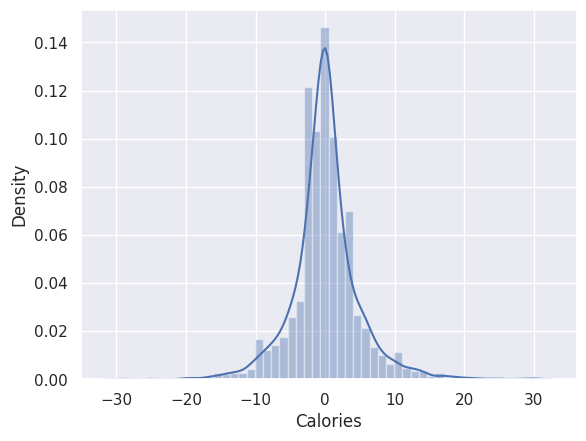

In [ ]:
sns.distplot(Y_test-test_data_prediction_3)

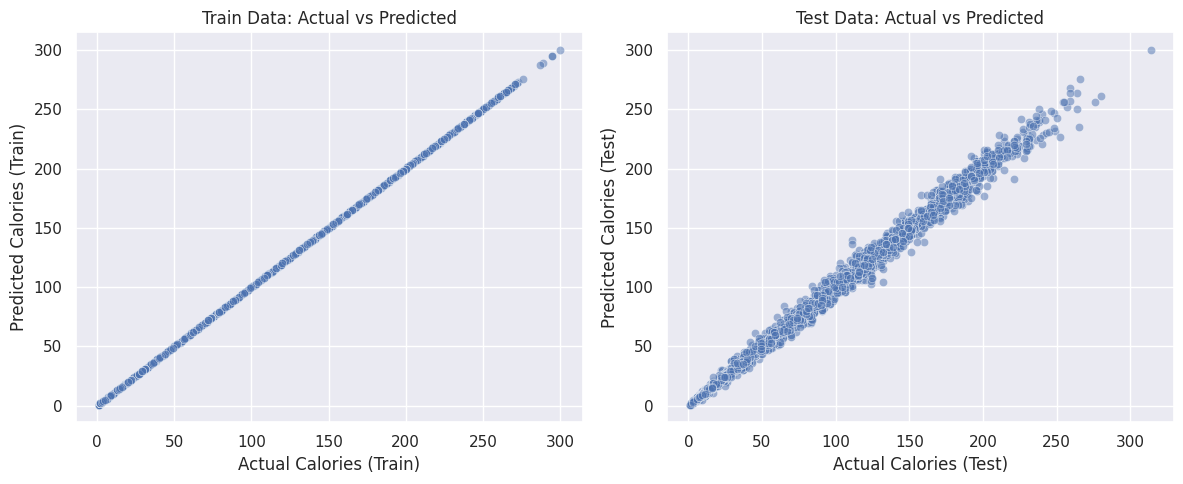

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predicting on train and test data
train_predictions = model_3.predict(X_train)
test_predictions = model_3.predict(X_test)

# Plot actual vs predicted for train and test sets
plt.figure(figsize=(12, 5))

# Train data plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=Y_train, y=train_predictions, alpha=0.5)
plt.xlabel("Actual Calories (Train)")
plt.ylabel("Predicted Calories (Train)")
plt.title("Train Data: Actual vs Predicted")

# Test data plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=Y_test, y=test_predictions, alpha=0.5)
plt.xlabel("Actual Calories (Test)")
plt.ylabel("Predicted Calories (Test)")
plt.title("Test Data: Actual vs Predicted")

plt.tight_layout()
plt.show()


In [ ]:
model_4 = RandomForestRegressor()

In [ ]:
# training the model with X_train
model_4.fit(X_train, Y_train)
print(model_4)

RandomForestRegressor()


In [ ]:
test_data_prediction_4 = model_4.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
R4 = r2_score(Y_test,test_data_prediction_4)

In [ ]:
M4 = metrics.mean_absolute_error(Y_test, test_data_prediction_4)

In [ ]:
Rm4 = metrics.root_mean_squared_error(Y_test, test_data_prediction_4)

<Axes: xlabel='Calories', ylabel='Density'>

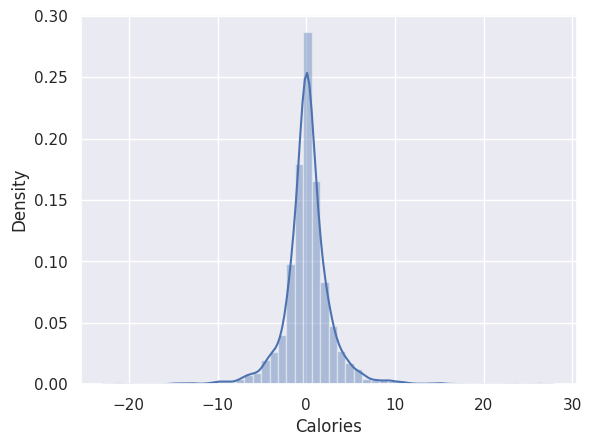

In [ ]:
sns.distplot(Y_test-test_data_prediction_4)

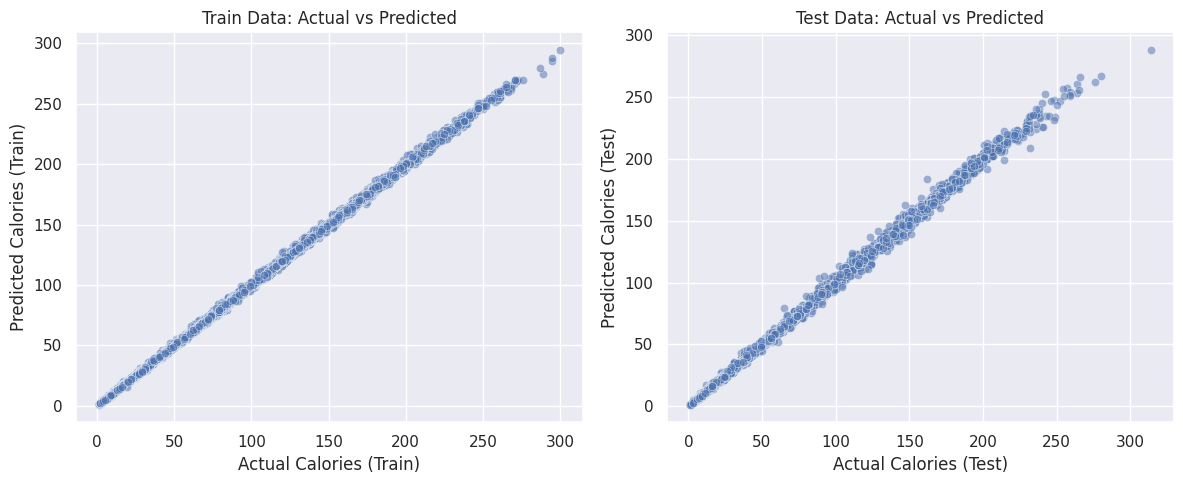

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predicting on train and test data
train_predictions = model_4.predict(X_train)
test_predictions = model_4.predict(X_test)

# Plot actual vs predicted for train and test sets
plt.figure(figsize=(12, 5))

# Train data plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=Y_train, y=train_predictions, alpha=0.5)
plt.xlabel("Actual Calories (Train)")
plt.ylabel("Predicted Calories (Train)")
plt.title("Train Data: Actual vs Predicted")

# Test data plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=Y_test, y=test_predictions, alpha=0.5)
plt.xlabel("Actual Calories (Test)")
plt.ylabel("Predicted Calories (Test)")
plt.title("Test Data: Actual vs Predicted")

plt.tight_layout()
plt.show()


In [ ]:
import pickle

pickle.dump(model_1, open('model_1.pkl', 'wb'))
pickle.dump(model_2, open('model_2.pkl', 'wb'))
pickle.dump(model_3, open('model_3.pkl', 'wb'))
pickle.dump(model_4, open('model_4.pkl', 'wb'))

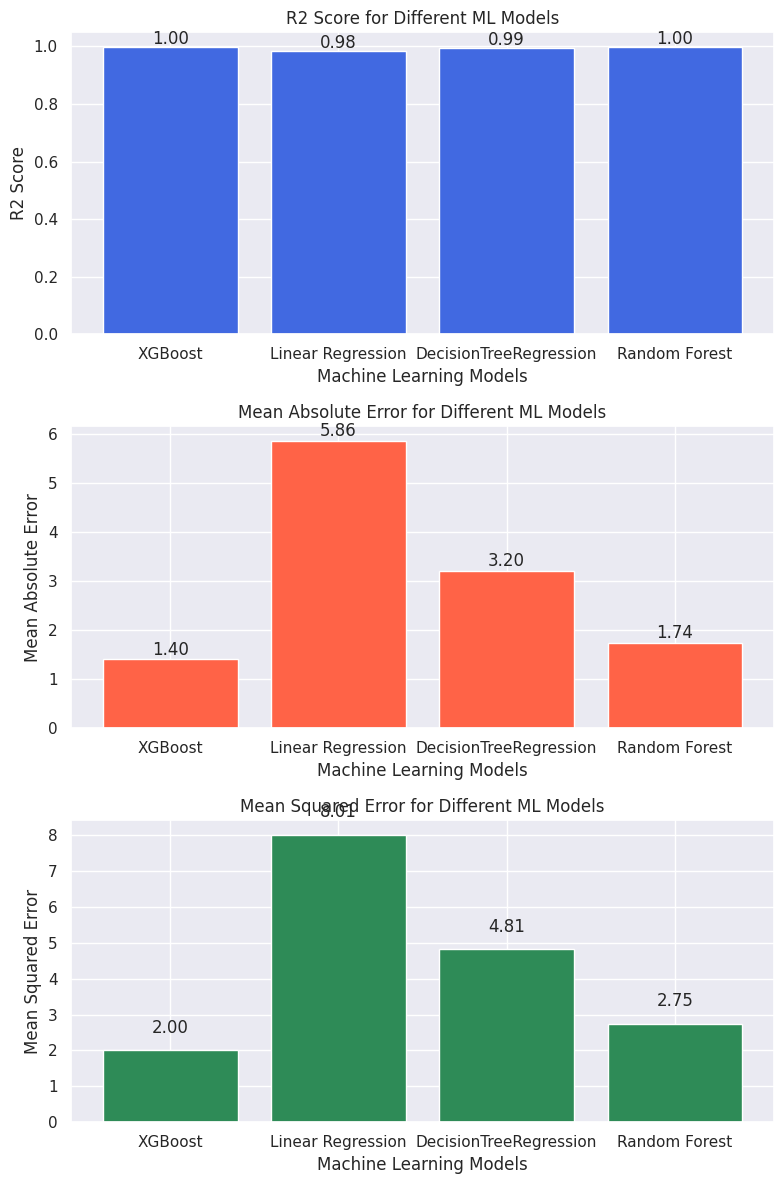

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data: R2 score, MAE, and MSE for 4 ML models
models = ['XGBoost', 'Linear Regression', 'DecisionTreeRegression', 'Random Forest']
r2_scores = [R1, R2, R3, R4]
mae_values = [M1,M2,M3,M4]
mse_values = [Rm1,Rm2,Rm3,Rm4]

x = np.arange(len(models))  # Label locations

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

# Plot R2 Score
axes[0].bar(models, r2_scores, color='royalblue')
axes[0].set_xlabel('Machine Learning Models')
axes[0].set_ylabel('R2 Score')
axes[0].set_title('R2 Score for Different ML Models')
for i, v in enumerate(r2_scores):
    axes[0].text(i, v + 0.01, f'{v:.2f}', ha='center')

# Plot Mean Absolute Error
axes[1].bar(models, mae_values, color='tomato')
axes[1].set_xlabel('Machine Learning Models')
axes[1].set_ylabel('Mean Absolute Error')
axes[1].set_title('Mean Absolute Error for Different ML Models')
for i, v in enumerate(mae_values):
    axes[1].text(i, v + 0.1, f'{v:.2f}', ha='center')

# Plot Mean Squared Error
axes[2].bar(models, mse_values, color='seagreen')
axes[2].set_xlabel('Machine Learning Models')
axes[2].set_ylabel('Mean Squared Error')
axes[2].set_title('Mean Squared Error for Different ML Models')
for i, v in enumerate(mse_values):
    axes[2].text(i, v + 0.5, f'{v:.2f}', ha='center')

plt.tight_layout()
plt.show()


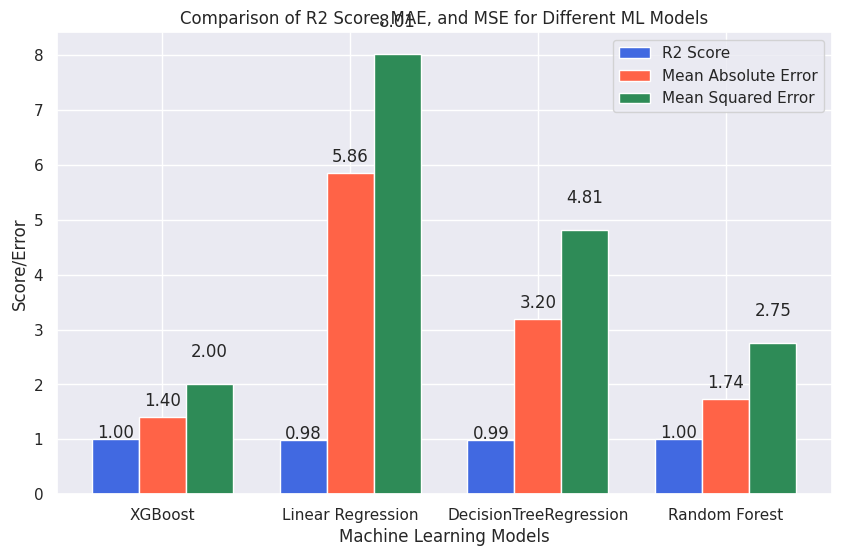

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data: R2 score, MAE, and MSE for 4 ML models
models = ['XGBoost', 'Linear Regression', 'DecisionTreeRegression', 'Random Forest']
r2_scores = [R1, R2, R3, R4]
mae_values = [M1,M2,M3,M4]
mse_values = [Rm1,Rm2,Rm3,Rm4]

x = np.arange(len(models))  # Label locations
width = 0.25  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for R2 Score, MAE, and MSE
ax.bar(x - width, r2_scores, width, label='R2 Score', color='royalblue')
ax.bar(x, mae_values, width, label='Mean Absolute Error', color='tomato')
ax.bar(x + width, mse_values, width, label='Mean Squared Error', color='seagreen')

# Labels and title
ax.set_xlabel('Machine Learning Models')
ax.set_ylabel('Score/Error')
ax.set_title('Comparison of R2 Score, MAE, and MSE for Different ML Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Display values on bars
for i in range(len(models)):
    ax.text(i - width, r2_scores[i] + 0.02, f'{r2_scores[i]:.2f}', ha='center')
    ax.text(i, mae_values[i] + 0.2, f'{mae_values[i]:.2f}', ha='center')
    ax.text(i + width, mse_values[i] + 0.5, f'{mse_values[i]:.2f}', ha='center')

plt.show()


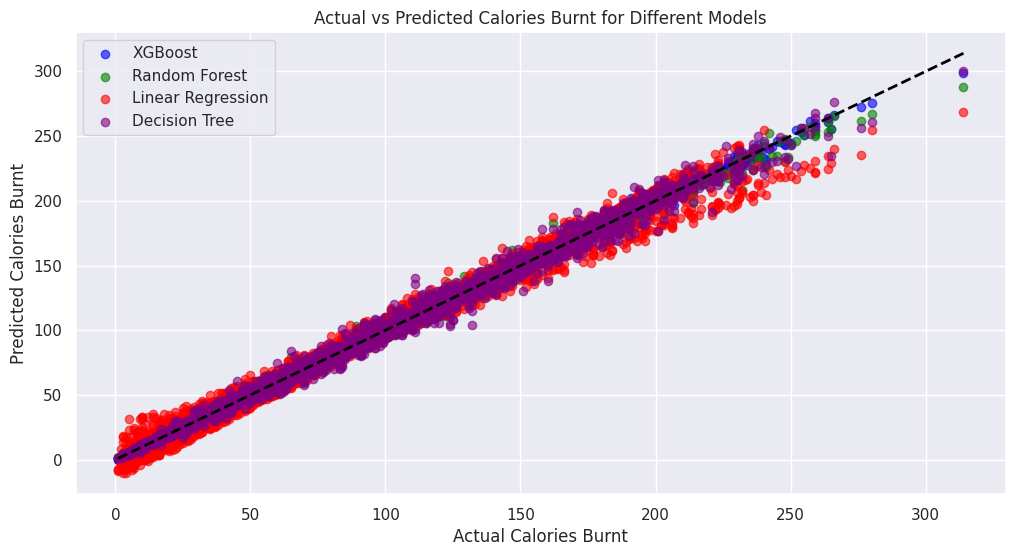

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test contains actual values and y_pred contains predicted values for each model

plt.figure(figsize=(12, 6))

# Scatter plot for Actual vs Predicted values
plt.scatter(Y_test, test_data_prediction_1, color='blue', label='XGBoost', alpha=0.6)
plt.scatter(Y_test, test_data_prediction_4, color='green', label='Random Forest', alpha=0.6)
plt.scatter(Y_test, test_data_prediction_2, color='red', label='Linear Regression', alpha=0.6)
plt.scatter(Y_test, test_data_prediction_3, color='purple', label='Decision Tree', alpha=0.6)

plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='black', linewidth=2)
plt.xlabel("Actual Calories Burnt")
plt.ylabel("Predicted Calories Burnt")
plt.title("Actual vs Predicted Calories Burnt for Different Models")
plt.legend()
plt.show()


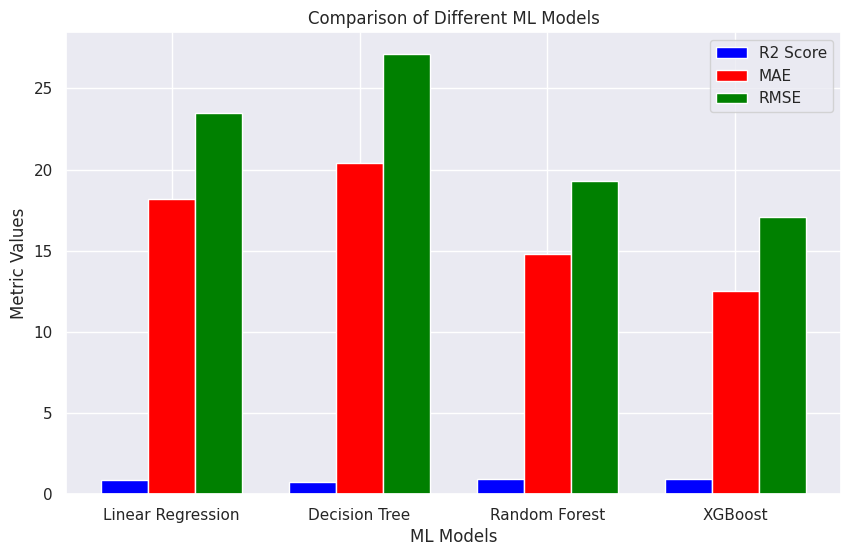

In [ ]:
import numpy as np

metrics = ['R2 Score', 'MAE', 'RMSE']
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost']

values = [
    [0.85, 0.78, 0.92, 0.94],  # R2 Score
    [18.2, 20.4, 14.8, 12.5],  # MAE
    [23.5, 27.1, 19.3, 17.1]   # RMSE
]

x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, values[0], width, label='R2 Score', color='blue')
bars2 = ax.bar(x, values[1], width, label='MAE', color='red')
bars3 = ax.bar(x + width, values[2], width, label='RMSE', color='green')

ax.set_xlabel("ML Models")
ax.set_ylabel("Metric Values")
ax.set_title("Comparison of Different ML Models")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()


In [ ]:
import shap

explainer = shap.Explainer(test_data_prediction_1)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)


TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: [127.849014 221.15054   39.230762 ... 147.74084   23.657784  90.27053 ]